In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Data visualization 

In [2]:
data = pd.read_excel("datasets/dataset.xlsx")
data = data.drop(0)
data.head()

Business name  Type    Size  Stock loss (Jan)  Stock loss AVG  \
1        Алкалоид   1.0  2000.0            -17.52           -5.75   
2     Реплек Фарм   1.0   380.0              6.30            2.06   
3           Бетон   2.0  1700.0            -27.70          -10.06   
4          Гранит   2.0  1500.0            -23.25           -7.67   
5  Макстил Скопје   3.0  1000.0            -18.90           -6.71   

   Stock loss LM  
1         -0.084  
2          1.071  
3        -17.600  
4          3.575  
5         -4.004

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Business name     20 non-null     object 
 1   Type              20 non-null     float64
 2   Size              20 non-null     float64
 3   Stock loss (Jan)  20 non-null     float64
 4   Stock loss AVG    20 non-null     float64
 5   Stock loss LM     20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


In [4]:
%matplotlib inline

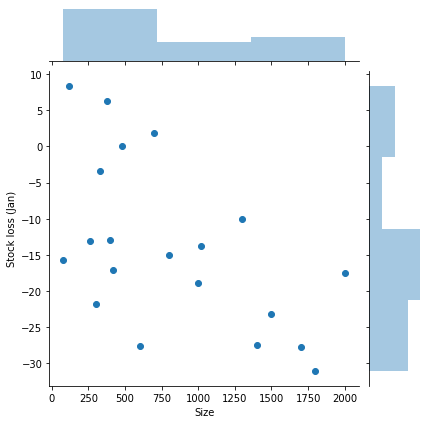

In [5]:
sns.jointplot(x="Size", y="Stock loss (Jan)", data = data)

Text(0.5, 1.0, 'Stock loss / Size of business')

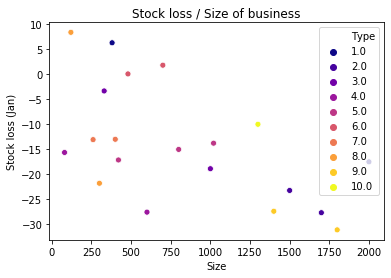

In [6]:
sns.scatterplot(x="Size", y="Stock loss (Jan)", data = data,
                hue="Type",palette="plasma",legend="full")
plt.title("Stock loss / Size of business")

Text(0.5, 1.0, 'Stock loss (from Jan 2020 till now )')

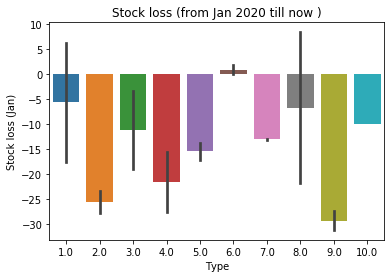

In [7]:
sns.barplot(x="Type", y="Stock loss (Jan)", data = data)
plt.title("Stock loss (from Jan 2020 till now )")

Text(0.5, 1.0, 'Stock loss (last month)')

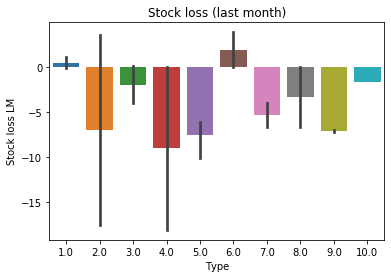

In [8]:
sns.barplot(x="Type", y="Stock loss LM", data = data)
plt.title("Stock loss (last month)")

Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
data_feat = data.drop(["Business name"], axis=1)
scaler = StandardScaler()
scaler.fit(data_feat)
scaled_data = scaler.transform(data_feat)

Defining Data clusters

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Clusters Visualization (Stock loss / Size)')

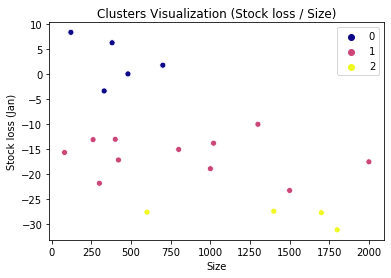

In [13]:
sns.scatterplot(x="Size", y="Stock loss (Jan)", data = data,
                hue=kmeans.labels_, palette="plasma",legend="full")
plt.title("Clusters Visualization (Stock loss / Size)")

Text(0.5, 1.0, 'Clusters Visualization - (Stock loss (compared to jan) / Stock loss (compared to last month))')

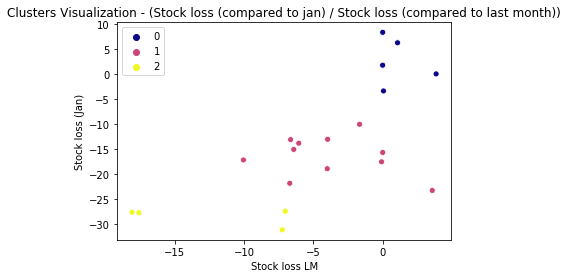

In [14]:
sns.scatterplot(x="Stock loss LM", y="Stock loss (Jan)", data = data,
                hue=kmeans.labels_, palette="plasma",legend="full")
plt.title("Clusters Visualization - (Stock loss (compared to jan) / Stock loss (compared to last month))")

Using clusters for data classification

In [15]:
data["classes"] = kmeans.labels_
data

Business name  Type    Size  Stock loss (Jan)  Stock loss AVG  \
1             Алкалоид   1.0  2000.0            -17.52          -5.750   
2          Реплек Фарм   1.0   380.0              6.30           2.060   
3                Бетон   2.0  1700.0            -27.70         -10.060   
4               Гранит   2.0  1500.0            -23.25          -7.670   
5       Макстил Скопје   3.0  1000.0            -18.90          -6.710   
6       Цементара Усје   3.0   330.0             -3.34          -1.120   
7             Макошпед   4.0    80.0            -15.65          -5.260   
8              Фершпед   4.0   600.0            -27.59          -9.860   
9   Комерцијална Банка   5.0  1020.0            -13.79          -4.620   
10                 НЛБ   5.0   800.0            -15.04          -4.940   
11     Охридска Банака   5.0   420.0            -17.15          -5.836   
12           Пекабеско   6.0   480.0              0.07           0.100   
13    Витаминка Прилеп   6.0   700.0              1.81           0.600   
14    Прилепска Пивара   7.0   260.0            -13.08          -4.550   
15             Тиквеш    7.0   400.0            -13.01          -4.530   
16      Метропол Охрид   8.0   120.0              8.39           2.780   
17   Македонија Турист   8.0   300.0            -21.81          -7.850   
18           Макпетрол   9.0  1800.0            -31.13         -11.240   
19                Окта   9.0  1400.0            -27.41          -9.850   
20  Македонски Телеком  10.0  1300.0            -10.01          -3.370   

    Stock loss LM  classes  
1          -0.084        1  
2           1.071        0  
3         -17.600        2  
4           3.575        1  
5          -4.004        1  
6           0.056        0  
7           0.000        1  
8         -18.095        2  
9          -6.060        1  
10         -6.421        1  
11        -10.055        1  
12          3.855        0  
13         -0.004        0  
14         -6.648        1  
15         -3.978        1  
16          0.000        0  
17         -6.708        1  
18         -7.246        2  
19         -7.035        2  
20         -1.670        1

In [22]:
# Defining the training data
X_train = data.drop(["Business name", "classes","Stock loss (Jan)",
                     "Stock loss AVG","Stock loss LM"], axis=1)
y_train = data["classes"]

Classification using SVC

In [29]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
# predicting random samles
X_test = [[6,500]]

predictions = svc_model.predict(X_test)
print(predictions)
## Needs more data

[1]


Classification using random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
# predicting random samles
X_test = [[6,500]]

predictions = rf_model.predict(X_test)
print(predictions)
## This model is better (but needs more data)

[0]
